# **IA Scientific Computing - Session 3**

Ruize Li (rl737)

Jesus College

a0 = 9.318 +/- 0.12
a1 = 0.032 +/- 0.004
a2 = 6.655 +/- 0.085
tau = 1.0 +/- 0.0
delta = -1.356 +/- 1.767
r = 1.6


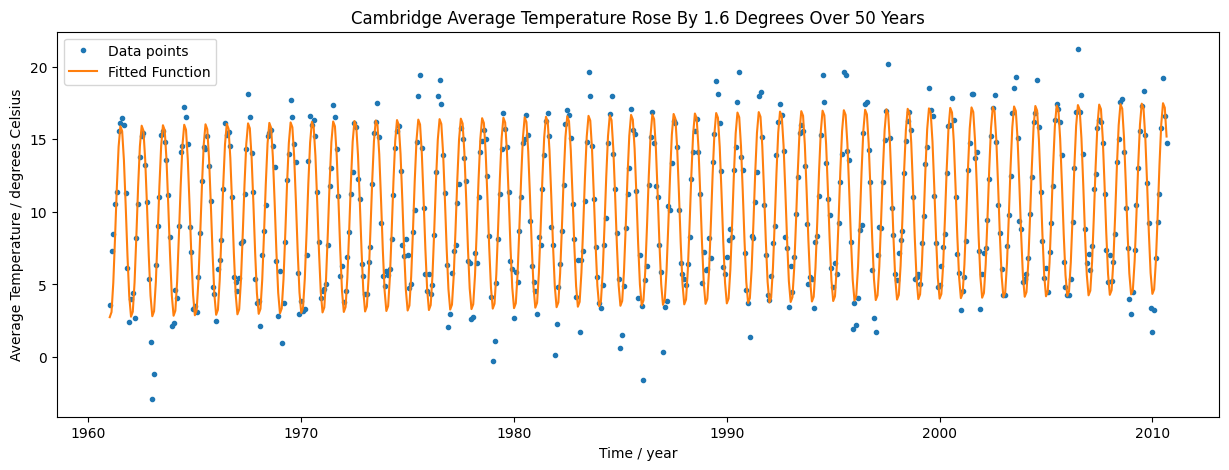

In [ ]:
# Import the packages we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load in the Cambridge.da.txt data file
data=np.genfromtxt('cambridge.dat.txt', delimiter='', skip_header=4)

y=data[0:597,0]
m=data[0:597,1]
t=y+(m-1)/12

Tmax=data[0:597,2]
Tmin=data[0:597,3]
T=(Tmax+Tmin)/2

# Define fit function
def fitfunc(t,a0,a1,a2,tau,delta):
    T = a0 + a1*(t - 1961) + a2*np.sin((2*np.pi / tau)*t + delta)
    return T

# Apply curve fit
popt,pcov = curve_fit(fitfunc,t,T)
perr = np.sqrt(np.diag(pcov))

# Report the values of the fitted parameters and their errors
print('a0 =', round(popt[0],3), '+/-', round(perr[0],3))
print('a1 =', round(popt[1],3), '+/-', round(perr[1],3))
print('a2 =', round(popt[2],3), '+/-', round(perr[2],3))
print('tau =', round(popt[3],3), '+/-', round(perr[3],3))
print('delta =', round(popt[4],3), '+/-', round(perr[4],3))

# Calculate average temperature rise over 50 years
r = 50*round(popt[1],3)
print('r =', r)

# Show fig and label everything
plt.figure(figsize=(15,5))
plt.title('Cambridge Average Temperature Rose By 1.6 Degrees Over 50 Years')
plt.plot(t,T,'.',label='Data points')
plt.plot(t,fitfunc(t,*popt),'-',label='Fitted Function')
plt.xlabel('Time / year')
plt.ylabel('Average Temperature / degrees Celsius')
plt.legend()
plt.savefig('session3fig.png',dpi=300)
plt.show()

# tau = 1 means the model is relatively correct